# Caso: Análisis de CDR de una Empresa de Telecomunicaciones

## Cargar archivos csv
Utilizamos un Call Detail Record de ejemplo
##### Clientes llamantes: 199
##### Clientes llamados: 400
##### Horizonte de tiempo: De Nov-2012 a Ene-2014 (15 meses)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import time

In [2]:
h = pd.read_csv('llamadas.csv')

Revisamos la información del DataFrame

In [3]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12362 entries, 0 to 12361
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fromuserid    12362 non-null  int64
 1   touserid      12362 non-null  int64
 2   numbercalls   12362 non-null  int64
 3   secondscalls  12362 non-null  int64
dtypes: int64(4)
memory usage: 386.4 KB


Transformamos el DataFrame en un Grafo dirigido con pesos (cantidad de llamadas y duración)

In [5]:
G = nx.from_pandas_edgelist(h, source="fromuserid", target="touserid", edge_attr=["numbercalls","secondscalls"], create_using=nx.DiGraph())

In [7]:
print(G)

DiGraph with 400 nodes and 12362 edges


Crear la función top_nodes que mostrará los valores más altos de un diccionario

In [8]:
def get_top_nodes(cdict, num=5):
    top_nodes ={}
    for i in range(num):
        top_nodes =dict(
            sorted(cdict.items(), key=lambda x: x[1], reverse=True)[:num]
            )
        return top_nodes

#### Grado

Guardar el grado de cada nodo en un diccionario

In [9]:
gdeg=G.degree()

In [10]:
G.degree(350024,weight="secondscalls")

274631

In [11]:
get_top_nodes(dict(gdeg))

{350024: 151, 350153: 148, 350120: 148, 350052: 147, 350156: 146}

(array([76., 40., 20.,  4.,  2.,  1.,  4.,  2.,  2.,  1.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

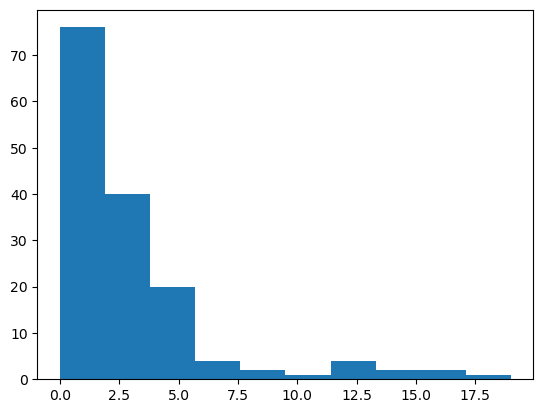

In [12]:
plt.hist(nx.degree_histogram(G))

In [ ]:
plt.figure(figsize=(80,45)) 
nx.draw_networkx(G, width=0.1, node_size=[100*val for(node,val)in gdeg])
plt.show()

#### In-Degree

In [16]:
indeg=G.in_degree()
get_top_nodes(dict(indeg))

{350009: 56, 350104: 53, 350118: 51, 350166: 50, 350156: 49}

#### Out-Degree

In [17]:
outdeg=G.out_degree()
get_top_nodes(dict(outdeg))

{350083: 110, 350052: 108, 350153: 107, 350024: 106, 350147: 105}

In [18]:
nx.set_node_attributes(G,dict(gdeg), 'd')
nx.set_node_attributes(G,dict(indeg), 'id')
nx.set_node_attributes(G,dict(outdeg), 'od')

In [19]:
gdeg=G.degree(weight="secondscalls")
indeg=G.in_degree(weight="secondscalls")
outdeg=G.out_degree(weight="secondscalls")
nx.set_node_attributes(G,dict(gdeg), 'wd')
nx.set_node_attributes(G,dict(indeg), 'wid')
nx.set_node_attributes(G,dict(outdeg), 'wod')

#### Degree Centrality

In [20]:
degree_centrality =nx.degree_centrality(G)
nx.set_node_attributes(G,degree_centrality, 'dc')
get_top_nodes(degree_centrality)

{350024: 0.37844611528822053,
 350153: 0.37092731829573933,
 350120: 0.37092731829573933,
 350052: 0.3684210526315789,
 350156: 0.3659147869674185}

In [ ]:
plt.figure(figsize=(80,45)) 
nx.draw_networkx(G, width=0.1, node_size=[1000*v for v in nx.get_node_attributes(G, 'dc').values()])

#### Betweenness

In [22]:
betweenness_centrality = nx.betweenness_centrality(G,weight="secondscalls")
nx.set_node_attributes(G,betweenness_centrality, 'bc')

In [23]:
get_top_nodes(betweenness_centrality)

{350146: 0.051890614307964204,
 350149: 0.04823197021028283,
 350050: 0.04615181169002909,
 491615: 0.04194846412513696,
 350058: 0.04161471517990957}

In [ ]:
plt.figure(figsize=(80,45)) 
nx.draw_networkx(G, width=0.1, node_size=[10000 * v for v in nx.get_node_attributes(G, 'bc').values()])

#### Closeness

In [25]:
closeness_centrality =nx.closeness_centrality(G,distance="secondscalls")
nx.set_node_attributes(G,closeness_centrality, 'cc')

In [26]:
get_top_nodes(closeness_centrality)

{350351: 0.0012212906415447356,
 350058: 0.0011350110791255932,
 350355: 0.0010927316088256487,
 350053: 0.0010791038087459431,
 350168: 0.0010580367313951752}

In [ ]:
plt.figure(figsize=(80,45)) 
pos =nx.spring_layout(G)
ec =nx.draw_networkx_edges(G, width=0.1, pos=pos)
nc =nx.draw_networkx_nodes(G, pos=pos,
                           node_color=[v for v in nx.get_node_attributes(G, 'cc').values()],
                           node_size=[100000 * v for v in nx.get_node_attributes(G, 'cc').values()])
lb =nx.draw_networkx_labels(G,pos =pos)

#### Eigenvector Centrality

In [28]:
eigenvector_centrality = nx.eigenvector_centrality(G,weight="secondscalls")
nx.set_node_attributes(G, eigenvector_centrality,'ec')

In [29]:
get_top_nodes(eigenvector_centrality)

{350009: 0.08893896365941653,
 350158: 0.08639273325401879,
 350055: 0.0840124878463603,
 350116: 0.08225797071783449,
 350163: 0.08207592021576958}

In [ ]:
plt.figure(figsize=(80,45)) 
nx.draw_networkx(G, width=0.1, node_size=[20000 * v for v in nx.get_node_attributes(G, 'ec').values()])

#### PageRank Centrality

In [31]:
pagerank_centrality =nx.pagerank(G,weight="secondscalls")
nx.set_node_attributes(G, pagerank_centrality, 'pr')

In [32]:
get_top_nodes(pagerank_centrality)

{350009: 0.004238294563463267,
 350055: 0.0037496240190207242,
 350143: 0.0037066697644054436,
 350014: 0.0034802272142822176,
 350118: 0.0034741822992928263}

In [ ]:
plt.figure(figsize=(80,45)) 
nx.draw_networkx(G, width=0.1, node_size=[50000 * v for v in nx.get_node_attributes(G, 'pr').values()], pos=pos)

## Métricas de Grafo

#### Densidad

In [36]:
nx.density(G)

0.0774561403508772

## Calculando el Valor de Red para cada Cliente

Extraer las métricas por nodo a un dataframe de Pandas

In [37]:
graph = G.nodes(data = True)

In [38]:
def func(graph):
    data={}
    data['fromuserid']=[x[0] for x in graph]
    other_cols = list([*graph][0][1].keys())
    for key in other_cols:
        data[key] = [x[1][key] for x in graph]
    return data

In [39]:
df = pd.DataFrame(func(graph)).sort_values(by=['fromuserid']).reset_index(drop=True)

In [40]:
df.head()

,fromuserid,d,id,od,wd,wid,wod,dc,bc,cc,ec,pr
0,350001,38,25,13,76683,58356,18327,0.095238,0.000057,0.000430,0.045354,0.002707
1,350002,85,23,62,169095,40584,128511,0.213033,0.002963,0.000598,0.032892,0.002428
2,350004,110,37,73,219347,70530,148817,0.275689,0.001354,0.000587,0.055589,0.003021
3,350005,98,35,63,195879,61745,134134,0.245614,0.002242,0.000621,0.047534,0.002735
4,350006,83,42,41,176209,91916,84293,0.208020,0.026027,0.000974,0.068849,0.002913


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fromuserid  400 non-null    int64  
 1   d           400 non-null    int64  
 2   id          400 non-null    int64  
 3   od          400 non-null    int64  
 4   wd          400 non-null    int64  
 5   wid         400 non-null    int64  
 6   wod         400 non-null    int64  
 7   dc          400 non-null    float64
 8   bc          400 non-null    float64
 9   cc          400 non-null    float64
 10  ec          400 non-null    float64
 11  pr          400 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 37.6 KB


Exportando para utilizar fuera

In [42]:
df.to_csv(r'ind_grafo.csv',index=False)

Elaborado por Luis Cajachahua bajo licencia MIT (2024)